In [1]:
from concurrent.futures import ThreadPoolExecutor
from matplotlib import pyplot as plt
import numpy as np
import os
from pathlib import Path
import torch
from tqdm.notebook import tqdm

from functions.dl.data_classes import SpectroDataset, CombinedSpectroDataset, SpectroDataLoader
from functions.plotting.clc_classes import plotCLCClasses
from functions.processing.retrieval import loadPT
base_directory = r'F:\\Persönliches\\Git\BioOTon\\XenoCanto'

In [2]:
def calculate_avg_snr(clean_path, noisy_path):
    diffs = []

    clean_file_paths = list(clean_path.glob("*.pt"))
    noisy_file_paths = list(noisy_path.glob("*.pt"))

    for clean_path, noisy_path in zip(clean_file_paths, noisy_file_paths):
    # Ensure tensors are floats
        print(f"Processing {clean_path} and {noisy_path}")
        clean = loadPT(clean_path)
        clean = clean.float()

        noisy = loadPT(noisy_path)
        noisy = noisy.float()
        
        # Noise is the difference between the two
        noise = noisy - clean
        
        # Calculate power (mean of squares)
        signal_power = torch.mean(abs(clean) ** 2, dim=list(range(1, clean.ndim)))
        noise_power = torch.mean(abs(noise) ** 2, dim=list(range(1, noise.ndim)))
        
        # Calculate SNR in dB
        # Adding a small epsilon to avoid division by zero or log(0)
        snr = 10 * torch.log10(signal_power / (noise_power + 1e-10))

        diffs.append(torch.mean(snr).item())
    
    return diffs, np.mean(diffs)

In [3]:
def calculate_avg_snr_mt(zipped_paths):
    clean_path, noisy_path = zipped_paths

    # Ensure tensors are floats
    print(f"Processing {clean_path} and {noisy_path}")
    clean = loadPT(clean_path)
    clean = clean.float()

    noisy = loadPT(noisy_path)
    noisy = noisy.float()
    
    # Noise is the difference between the two
    noise = noisy - clean
    
    # Calculate power (mean of squares)
    signal_power = torch.mean(abs(clean) ** 2, dim=list(range(1, clean.ndim)))
    noise_power = torch.mean(abs(noise) ** 2, dim=list(range(1, noise.ndim)))
    
    # Calculate SNR in dB
    # Adding a small epsilon to avoid division by zero or log(0)
    snr = 10 * torch.log10(signal_power / (noise_power + 1e-10))

    return torch.mean(snr).item()

In [4]:
clean_path = Path(f"./AudioTensors")
noisy_path = Path(f"./AudioTensors_denoised")

clean_file_paths = list(clean_path.glob("*.pt"))
noisy_file_paths = list(noisy_path.glob("*.pt"))

file_paths = zip(clean_file_paths, noisy_file_paths)

with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    # Use a list to hold the results so tqdm can track progress
    results = list(tqdm(
        executor.map(lambda f: calculate_avg_snr_mt(f), file_paths), 
        total=len(clean_file_paths),
        desc="Computing signal to noise ratio."
    ))

Processing AudioTensors\18961158_audio.pt and AudioTensors_denoised\18961158_audio_dn.pt
Processing AudioTensors\19009918_audio.pt and AudioTensors_denoised\19009918_audio_dn.pt
Processing AudioTensors\19015279_audio.pt and AudioTensors_denoised\19015279_audio_dn.pt
Processing AudioTensors\19017806_audio.pt and AudioTensors_denoised\19017806_audio_dn.pt
Processing AudioTensors\19017807_audio.pt and AudioTensors_denoised\19017807_audio_dn.pt
Processing AudioTensors\19017808_audio.pt and AudioTensors_denoised\19017808_audio_dn.pt
Processing AudioTensors\19061004_audio.pt and AudioTensors_denoised\19061004_audio_dn.pt
Processing AudioTensors\19068740_audio.pt and AudioTensors_denoised\19068740_audio_dn.pt
Processing AudioTensors\19074863_audio.pt and AudioTensors_denoised\19074863_audio_dn.pt
Processing AudioTensors\19096975_audio.pt and AudioTensors_denoised\19096975_audio_dn.pt
Processing AudioTensors\19101466_audio.pt and AudioTensors_denoised\19101466_audio_dn.pt
Processing AudioTenso

Computing signal to noise ratio.:   0%|          | 0/43826 [00:00<?, ?it/s]

Processing AudioTensors\19115260_audio.pt and AudioTensors_denoised\19115260_audio_dn.pt
Processing AudioTensors\19117753_audio.pt and AudioTensors_denoised\19117753_audio_dn.pt
Processing AudioTensors\19117754_audio.pt and AudioTensors_denoised\19117754_audio_dn.pt
Processing AudioTensors\19122003_audio.pt and AudioTensors_denoised\19122003_audio_dn.pt
Processing AudioTensors\19123188_audio.pt and AudioTensors_denoised\19123188_audio_dn.pt
Processing AudioTensors\19124887_audio.pt and AudioTensors_denoised\19124887_audio_dn.pt
Processing AudioTensors\19124892_audio.pt and AudioTensors_denoised\19124892_audio_dn.pt
Processing AudioTensors\19126724_audio.pt and AudioTensors_denoised\19126724_audio_dn.pt
Processing AudioTensors\19126725_audio.pt and AudioTensors_denoised\19126725_audio_dn.pt
Processing AudioTensors\19130492_audio.pt and AudioTensors_denoised\19130492_audio_dn.pt
Processing AudioTensors\19132103_audio.pt and AudioTensors_denoised\19132103_audio_dn.pt
Processing AudioTenso

In [ ]:
# torch.save(results, "SNR.pt")

Text(0.5, 1.0, 'Avg. SNR among all instances in the Dawn Chorus data')

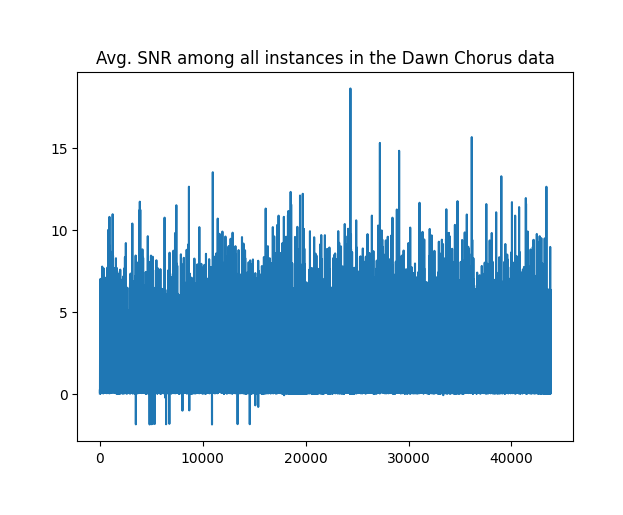

In [6]:
plt.plot(results)
plt.title("Avg. SNR among all instances in the Dawn Chorus data")

In [12]:
mean_snr = np.nanmean(results)
print(f"Mean SNR: {mean_snr}")
mean_squared_snr = np.nanmean(np.square(results))
print(f"Mean squared SNR: {mean_squared_snr}")
print("###################################\n")

var_snr = np.nanvar(results)
print(f"SNR Variance: {var_snr}")
std_snr = np.nanstd(results)
print(f"SNR Std: {std_snr}")
print("###################################\n")

min_snr = np.nanmin(results)
print(f"Min SNR: {min_snr}")
max_snr = np.nanmax(results)
print(f"Max SNR: {max_snr}")
print("###################################\n")

Mean SNR: 1.7370227517750059
Mean squared SNR: 6.102055436026619
###################################

SNR Variance: 3.084807395842604
SNR Std: 1.7563619774529977
###################################

Min SNR: -1.8452669382095337
Max SNR: 18.634674072265625
###################################



In [14]:
clean_path = Path(f"{base_directory}Tensors")
noisy_path = Path(base_directory+"_denoised")

clean_file_paths = list(clean_path.glob("*.pt"))
noisy_file_paths = list(noisy_path.glob("*.pt"))

file_paths = zip(clean_file_paths, noisy_file_paths)

with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    # Use a list to hold the results so tqdm can track progress
    results = list(tqdm(
        executor.map(lambda f: calculate_avg_snr_mt(f), file_paths), 
        total=len(clean_file_paths),
        desc="Computing signal to noise ratio."
    ))

Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1000092_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1000092_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1000096_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1000096_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1000106_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1000106_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1000371_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1000371_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1000906_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1000906_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1001124_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1001124_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1001127_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1001127_audi

Computing signal to noise ratio.:   0%|          | 0/6895 [00:00<?, ?it/s]

Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1002719_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1002719_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1002946_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1002946_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1002961_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1002961_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1003230_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1003230_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1003871_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1003871_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1003889_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1003889_audio_dn.pt
Processing F:\Persönliches\Git\BioOTon\XenoCantoTensors\1004109_audio.pt and F:\Persönliches\Git\BioOTon\XenoCanto_denoised\1004109_audi

Text(0.5, 1.0, 'Avg. SNR among all instances in the Xeno-Canto data')

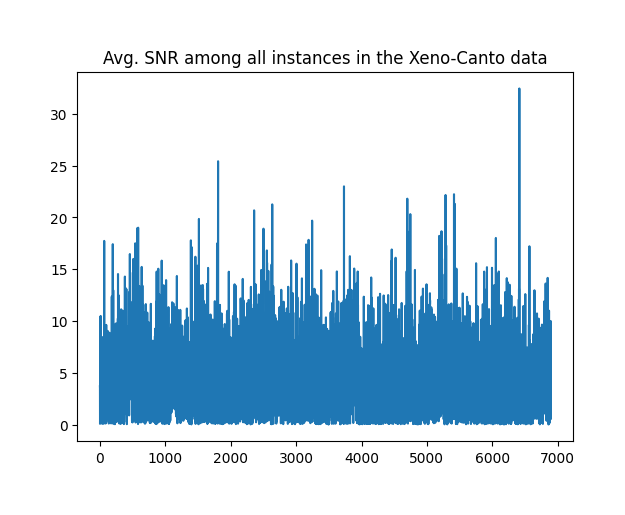

In [15]:
plt.plot(results)
plt.title("Avg. SNR among all instances in the Xeno-Canto data")

In [16]:
mean_snr = np.nanmean(results)
print(f"Mean SNR: {mean_snr}")
mean_squared_snr = np.mean(np.square(results))
print(f"Mean squared SNR: {mean_squared_snr}")
print("###################################\n")

var_snr = np.var(results)
print(f"SNR Variance: {var_snr}")
std_snr = np.std(results)
print(f"SNR Std: {std_snr}")
print("###################################\n")

min_snr = np.min(results)
print(f"Min SNR: {min_snr}")
max_snr = np.max(results)
print(f"Max SNR: {max_snr}")
print("###################################\n")

Mean SNR: 4.1039773888850855
Mean squared SNR: 28.53814860711925
###################################

SNR Variance: 11.695518198639208
SNR Std: 3.4198710792424922
###################################

Min SNR: 0.018875353038311005
Max SNR: 32.44297790527344
###################################



In [17]:
dawn_file = "F:/Persönliches/Git/BioOTon/points_single.parquet"
xeno_file = "F:/Persönliches/Git/BioOTon/xeno_points_single.parquet"
augmented_file = "F:/Persönliches/Git/BioOTon/augmented_points_single.parquet"

ds = CombinedSpectroDataset(dawn_file, xeno_file, augmented_file, device = "cuda", denoised = True)

In [18]:
from matplotlib import pyplot as plt
import pandas as pd

In [19]:
df = pd.DataFrame({"ids": [int(file.stem.replace("wn_","").replace("_audio_dn","")) for file in ds.combined_file_paths],  "label" : [int(label) for label in ds.combined_point_labels]})

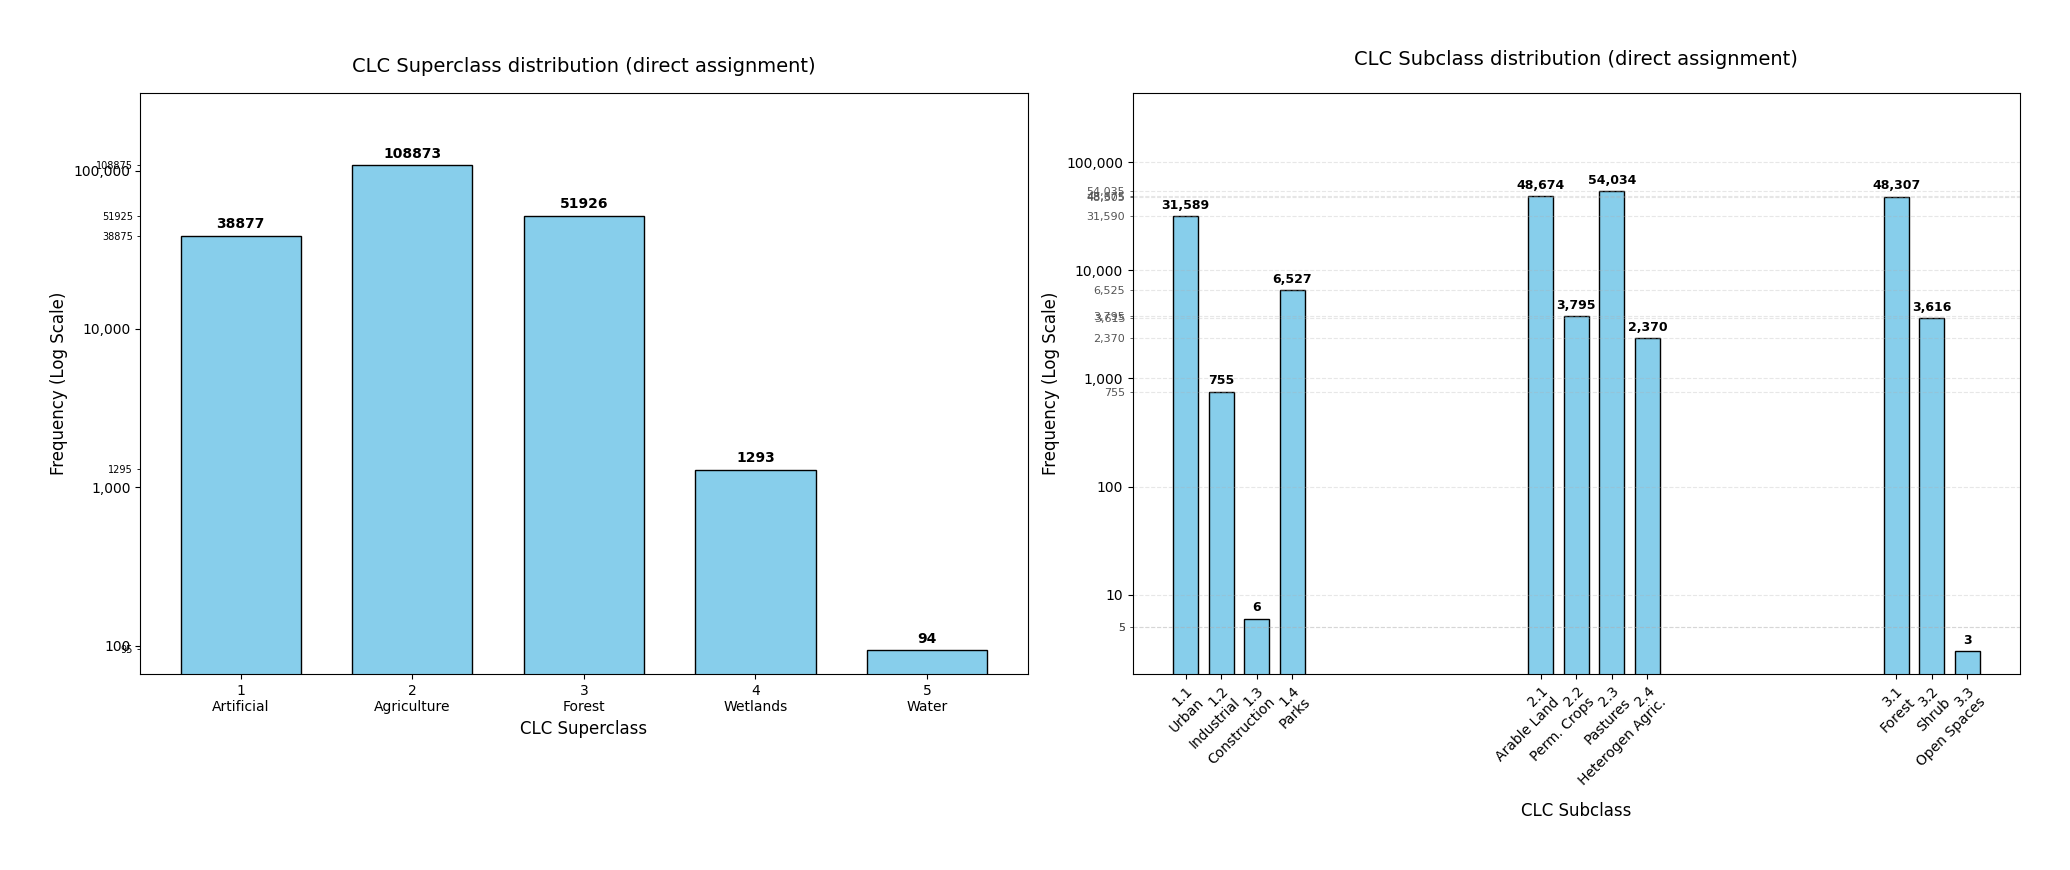

In [20]:
combined_fig = plotCLCClasses(df, method="direct assignment")